In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
# List of your .dat file names
file_names = ['DumpText_FullLayerdR3Pt5_SingleElectron_100k.dat', 'DumpText_FullLayerdR3Pt5_SingleElectron_200k.dat', 
              'DumpText_FullLayerdR3Pt5_SingleElectron_300k.dat', 'DumpText_FullLayerdR3Pt5_SingleElectron_400k.dat', 
              'DumpText_FullLayerdR3Pt5_SingleElectron_500k.dat', 'DumpText_FullLayerdR3Pt5_SingleElectron_600k.dat', 
              'DumpText_FullLayerdR3Pt5_SingleElectron_700k.dat', 'DumpText_FullLayerdR3Pt5_SingleElectron_800k.dat', 
              'DumpText_FullLayerdR3Pt5_SingleElectron_900k.dat', 'DumpText_FullLayerdR3Pt5_SingleElectron_1000k.dat']

# List of arrays of 10 .dat files
all_arrays = []

# Function to read a single file and convert its contents to a NumPy array
def read(file_name):
    with open(file_name, 'r') as file:
        csv_reader = csv.reader(file)
        values = [float(value) for row in csv_reader for value in row if value]
        return np.array(values)

# Read each file and store the result in all_arrays
for file in file_names:
    data = read(file)
    all_arrays.append(data)
    
# Reshape data to have 323 elements in each event
reshaped_arrays = [np.reshape(array,(-1,323))for array in all_arrays]
for index, array in enumerate(reshaped_arrays):
    array[:, 0] += index*100000

In [3]:
# Stack all 10 arrays in to 1
all_data = np.vstack(reshaped_arrays)  

# Get unique elements from the first column along with their counts and indices
uelement, counts = np.unique(all_data[:, 0], return_counts=True)
uindex = np.unique(all_data[:, 0], return_index=True)[1]

# Initialize an empty array to store the result
ele = []

# Iterate through unique elements
for i in range(len(uelement)):
    # If the element is repeated, find the row with the maximum sum in the other columns
    if counts[i] > 1:
        indices = np.where(all_data[:, 0] == uelement[i])[0]
        maxindex = np.argmax(np.sum(all_data[indices, 20:], axis=1))
        ele.append(all_data[indices[maxindex]])
    else:
        # If the element is not repeated, directly append the row to the result
        ele.append(all_data[uindex[i]])

# Convert the result to a NumPy array
ele = np.array(ele)
print(ele.shape)

(434998, 323)


In [4]:
# Create boolean masks for each condition
mask1 = np.all(ele[:, 20:83] < 0, axis=1)
mask2 = np.all(ele[:, 83:134] < 0, axis=1)
mask3 = np.all(ele[:, 134:197] < 0, axis=1)
mask4 = np.all(ele[:, 197:260] < 0, axis=1)
mask5 = np.all(ele[:, 260:] < 0, axis=1)

# Combine masks - row is True if any conditions are met
combined_mask =  mask1 | mask2 | mask3 | mask4 | mask5 

# Invert mask to keep rows where not all conditions are met
filtered_ele = ele[~combined_mask]
filtered_ele.shape

(434998, 323)

In [5]:
truez_ele = filtered_ele[:,2]
psb_ele = filtered_ele[:,20:83]
emb1_ele = filtered_ele[:,83:134]
emb2_ele = filtered_ele[:,134:197]
emb3_ele = filtered_ele[:,197:260]                   
hab1_ele = filtered_ele[:,260:]

# apply noise cut to all layers
psb_ele_f = np.copy(psb_ele)
psb_ele_f[psb_ele_f < 0] = 0
emb1_ele_f = np.copy(emb1_ele)
emb1_ele_f[emb1_ele_f < 0] = 0
emb2_ele_f = np.copy(emb2_ele)
emb2_ele_f[emb2_ele_f < 0] = 0
emb3_ele_f = np.copy(emb3_ele)
emb3_ele_f[emb3_ele_f < 0] = 0
hab1_ele_f = np.copy(hab1_ele)
hab1_ele_f[hab1_ele_f < 0] = 0

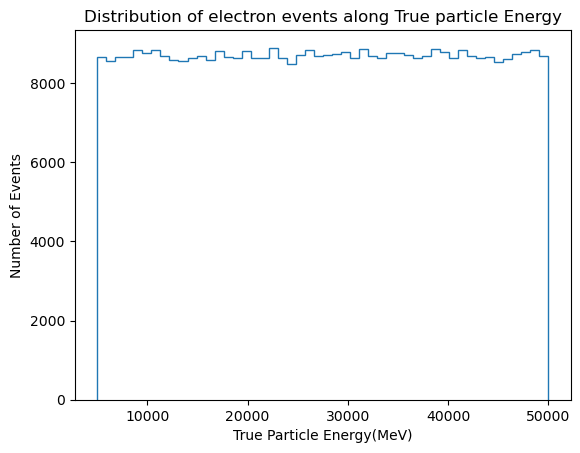

In [6]:
true_Pt = filtered_ele[:,3]
plt.hist(true_Pt, bins=50,histtype='step')
plt.xlabel('True Particle Energy(MeV)')
plt.ylabel('Number of Events')
plt.title('Distribution of electron events along True particle Energy')
plt.show()

Text(0, 0.5, '$\\phi$(index)')

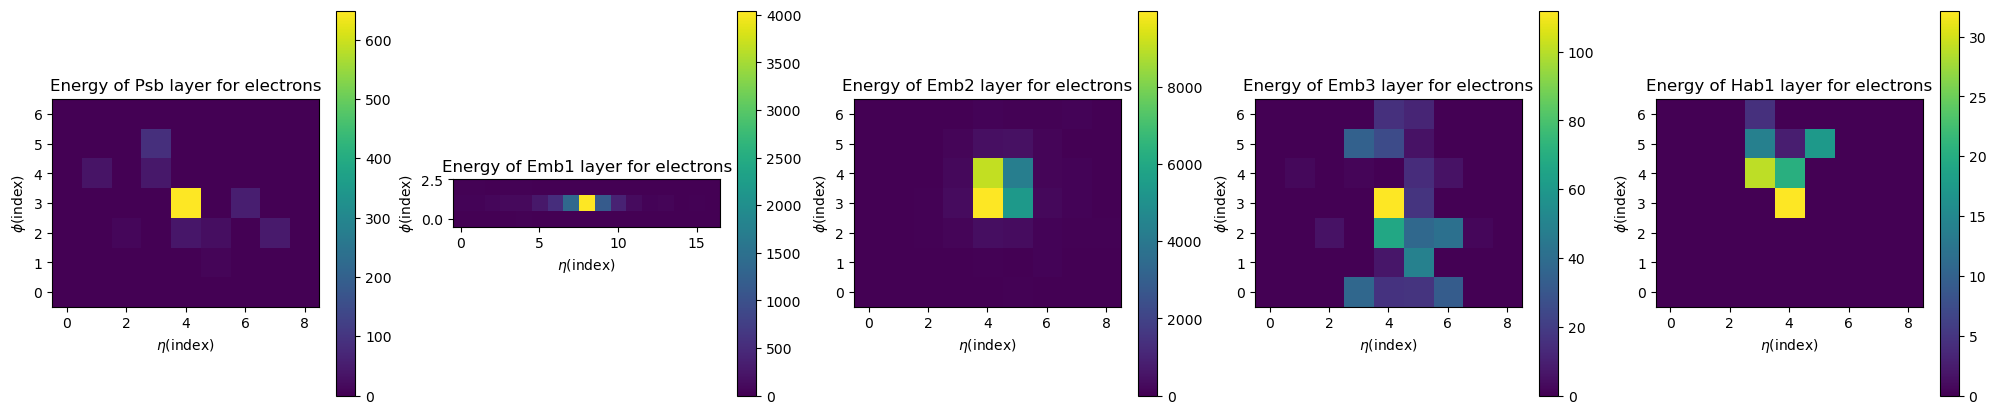

In [7]:
psbpt = psb_ele_f.reshape(-1,7,9)
emb1pt = emb1_ele_f.reshape(-1,3,17)
emb2pt = emb2_ele_f.reshape(-1,7,9)
emb3pt = emb3_ele_f.reshape(-1,7,9)
hab1pt = hab1_ele_f.reshape(-1,7,9)

fig, axs = plt.subplots(1, 5, figsize=(25, 5))
psbpt1 = axs[0].imshow(psbpt[0,:,:], origin='lower')
fig.colorbar(psbpt1, ax=axs[0])
axs[0].set_title('Energy of Psb layer for electrons')
axs[0].set_xlabel('$\eta$(index)')
axs[0].set_ylabel('$\phi$(index)')

emb1pt1 = axs[1].imshow(emb1pt[0,:,:], origin='lower')
fig.colorbar(emb1pt1, ax=axs[1])
axs[1].set_title('Energy of Emb1 layer for electrons')
axs[1].set_xlabel('$\eta$(index)')
axs[1].set_ylabel('$\phi$(index)')

emb2pt1 = axs[2].imshow(emb2pt[0,:,:], origin='lower')
fig.colorbar(emb2pt1, ax=axs[2])
axs[2].set_title('Energy of Emb2 layer for electrons')
axs[2].set_xlabel('$\eta$(index)')
axs[2].set_ylabel('$\phi$(index)')

emb3pt1 = axs[3].imshow(emb3pt[0,:,:], origin='lower')
fig.colorbar(emb3pt1, ax=axs[3])
axs[3].set_title('Energy of Emb3 layer for electrons')
axs[3].set_xlabel('$\eta$(index)')
axs[3].set_ylabel('$\phi$(index)')

hab1pt1 = axs[4].imshow(hab1pt[0,:,:], origin='lower')
fig.colorbar(hab1pt1, ax=axs[4])
axs[4].set_title('Energy of Hab1 layer for electrons')
axs[4].set_xlabel('$\eta$(index)')
axs[4].set_ylabel('$\phi$(index)')

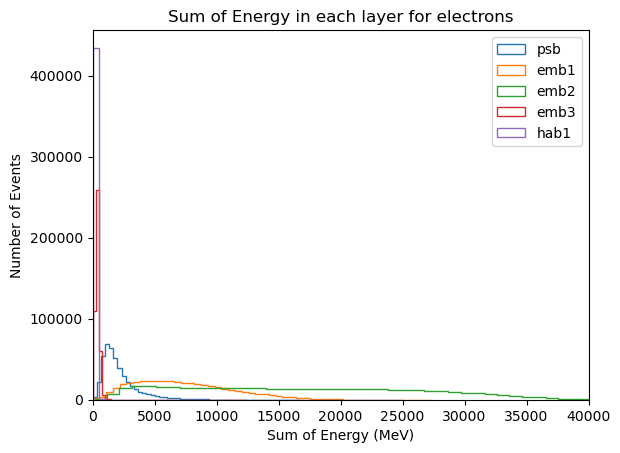

In [8]:
# Sum of energy in each layer
sumpsb_ele = np.sum(psb_ele_f, axis=1)
sumemb1_ele = np.sum(emb1_ele_f, axis=1)
sumemb2_ele = np.sum(emb2_ele_f, axis=1)
sumemb3_ele = np.sum(emb3_ele_f, axis=1)
sumhab1_ele = np.sum(hab1_ele_f, axis=1)

# Plot the sum
plt.hist(sumpsb_ele, bins=50, histtype='step', label='psb')
plt.hist(sumemb1_ele, bins=50, histtype='step', label='emb1')
plt.hist(sumemb2_ele, bins=50, histtype='step', label='emb2')
plt.hist(sumemb3_ele, bins=50, histtype='step', label='emb3')
plt.hist(sumhab1_ele, bins=50, histtype='step', label='hab1')
plt.xlim(0, 40000)
plt.xlabel('Sum of Energy (MeV)')
plt.ylabel('Number of Events')
plt.title('Sum of Energy in each layer for electrons')
plt.legend()
plt.show()

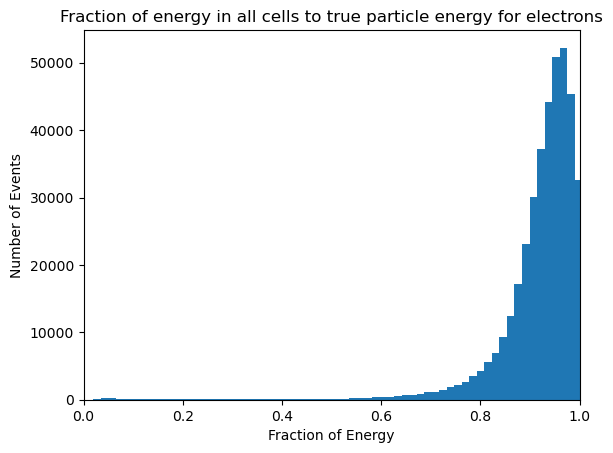

In [9]:
cellsum = np.sum(ele[:,20:],axis=1)
true_Pt = ele[:,3]
plt.hist(cellsum/true_Pt, bins=80)
plt.xlim(0,1)
plt.xlabel('Fraction of Energy')
plt.ylabel('Number of Events')
plt.title('Fraction of energy in all cells to true particle energy for electrons')
plt.show()

In [10]:
# sum of all cells
cells_sum = np.sum(filtered_ele[:,20:], axis=1).reshape(-1, 1)
true_Pt = filtered_ele[:,3].reshape(-1, 1)

# sum of layers in phi
psb_sum = np.sum(psb_ele_f.reshape(-1,7,9), axis=1)
emb1_sum = np.sum(emb1_ele_f.reshape(-1,3,17), axis=1)
emb2_sum = np.sum(emb2_ele_f.reshape(-1,7,9), axis=1)
emb3_sum = np.sum(emb3_ele_f.reshape(-1,7,9), axis=1)
hab1_sum = np.sum(hab1_ele_f.reshape(-1,7,9), axis=1)

# normalised sums
psb_nsum = psb_sum / cells_sum
emb1_nsum = emb1_sum / cells_sum
emb2_nsum = emb2_sum / cells_sum
emb3_nsum = emb3_sum / cells_sum
hab1_nsum = hab1_sum / cells_sum

# center eta of layers
psb_eta = filtered_ele[:,6]
emb1_eta = filtered_ele[:,8]
emb2_eta = filtered_ele[:,10]
emb3_eta = filtered_ele[:,12]
hab1_eta = filtered_ele[:,14]
differ1 = psb_eta - emb1_eta
differ2 = emb1_eta - emb2_eta
differ3 = emb2_eta - emb3_eta
differ4 = emb3_eta - hab1_eta

In [11]:
train_input1 = np.column_stack((psb_nsum,emb1_nsum,emb2_nsum,
                              psb_eta.reshape(-1,1),emb1_eta.reshape(-1,1),emb2_eta.reshape(-1,1),
                              differ1.reshape(-1,1),differ2.reshape(-1,1)))

train_input2 = np.column_stack((psb_nsum,emb1_nsum,emb2_nsum,emb3_nsum,hab1_nsum,hab1_eta.reshape(-1,1),
                              psb_eta.reshape(-1,1),emb1_eta.reshape(-1,1),emb2_eta.reshape(-1,1),emb3_eta.reshape(-1,1),
                              differ1.reshape(-1,1),differ2.reshape(-1,1),differ3.reshape(-1,1),differ4.reshape(-1,1)))

# no improvement when applying emb3 and hab1 layer information

train_target = truez_ele
train_input1.shape

(434998, 40)

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# split data into train and test datasets
xtrain, xtest, ytrain, ytest = train_test_split(train_input2, train_target, test_size=0.2)

# create the xgboost model
model = xgb.XGBRegressor(
    learning_rate=0.2,    # Controls the step size shrinkage
    n_estimators=600,      # Number of boosting rounds or trees
    max_depth=6,     # Maximum depth of a tree
    objective='reg:squarederror'
)

model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

# calculate RMS
def RMS(actual,predict):
    residual = actual - predict
    return np.sqrt(np.mean(residual**2))

print(RMS(ytest,ypred))

36.01035901563782


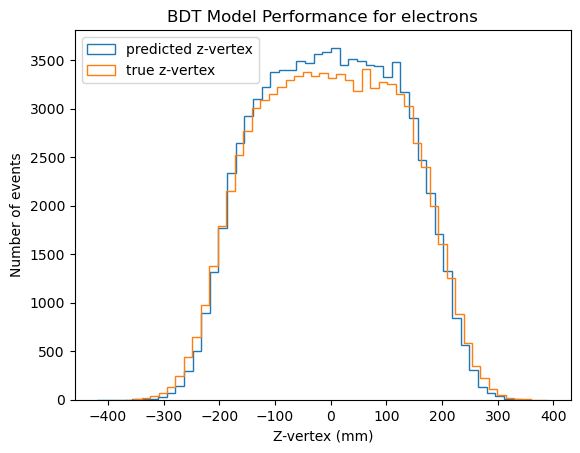

In [13]:
# plot the result
plt.hist(ypred, bins=50,histtype='step',label='predicted z-vertex')
plt.hist(ytest, bins=50,histtype='step',label='true z-vertex')
plt.xlabel('Z-vertex (mm)')
plt.ylabel('Number of events')
plt.title('BDT Model Performance for electrons')
plt.legend()
plt.show()

0.993915017617658


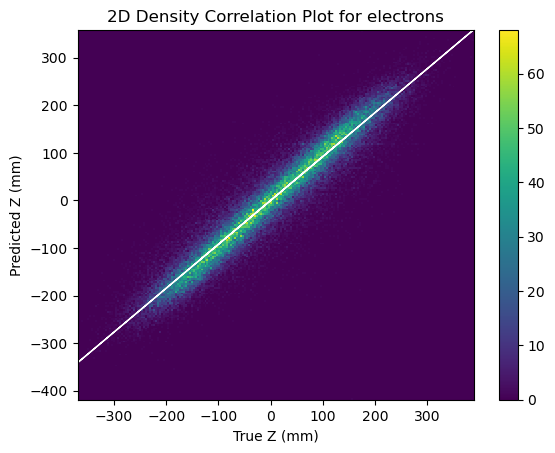

In [14]:
# Creating the hexbin plot
hb = plt.hist2d(ytest, ypred, bins=200)
plt.colorbar()

# Adding a best-fit line
m, b = np.polyfit(ytest, ypred, 1)  # Compute the best-fit line parameters
plt.plot(ytest, m*ytest + b, color='white', linewidth=1)  # Add the best-fit line to the plot
rs = 1 - np.sum((ytest-(m*ytest + b))**2)/np.sum((ytest-np.mean(ytest))**2)
print(rs)
# Customizing the plot
plt.xlabel('True Z (mm)')
plt.ylabel('Predicted Z (mm)')
plt.title('2D Density Correlation Plot for electrons')
plt.show()

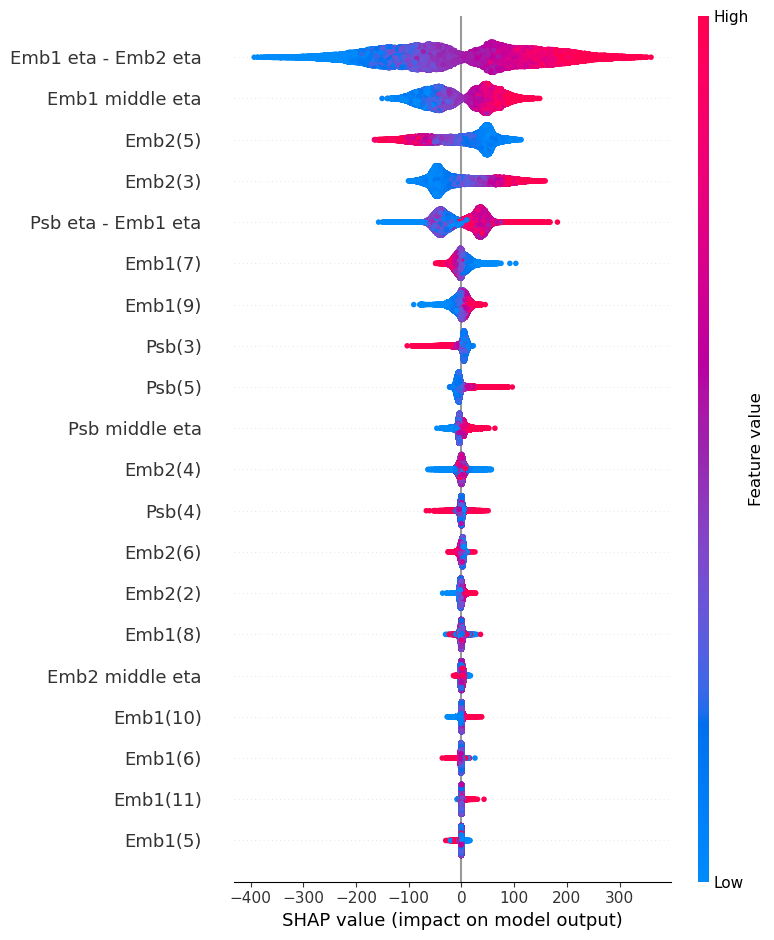

In [15]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(xtest,check_additivity=False)
fn = ['Psb(0)','Psb(1)','Psb(2)','Psb(3)','Psb(4)','Psb(5)','Psb(6)','Psb(7)','Psb(8)',
      'Emb1(0)','Emb1(1)','Emb1(2)','Emb1(3)','Emb1(4)','Emb1(5)','Emb1(6)','Emb1(7)','Emb1(8)',
      'Emb1(9)','Emb1(10)','Emb1(11)','Emb1(12)','Emb1(13)','Emb1(14)','Emb1(15)','Emb1(16)',
      'Emb2(0)','Emb2(1)','Emb2(2)','Emb2(3)','Emb2(4)','Emb2(5)','Emb2(6)','Emb2(7)','Emb2(8)',
      'Psb middle eta','Emb1 middle eta','Emb2 middle eta','Psb eta - Emb1 eta','Emb1 eta - Emb2 eta']
shap.summary_plot(shap_values, xtest,feature_names=fn)